In [ ]:
!pip install keras

In [2]:
#Libraries#

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
##Directory##

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
##Data loader##

TRAIN_PATH = '/content/drive/My Drive/Research_MedicalImaging/Leuk study re-designed/ALLIDB-2/High imbalance/Train - 1 to 100 ratio/all'
BATCH_SIZE=4

import os
import skimage
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

data = []
i = 0
plt.figure(figsize=(15, 15))

list_img = os.listdir(TRAIN_PATH)

for img in list_img:
    img_path = os.path.join(TRAIN_PATH, img)
    print(img_path)

    arr = imread(img_path)
    data.append(arr)


/content/drive/My Drive/Research_MedicalImaging/Leuk study re-designed/ALLIDB-2/High imbalance/Train - 1 to 100 ratio/all/Im074_1.tif


<Figure size 1500x1500 with 0 Axes>

In [ ]:
##Create train data##

random.shuffle(data)

x_train = []


for features in data:
    x_train.append(features)



x_train = np.array(x_train)

print(x_train.shape)
print(x_train.dtype)

r=c=452
import skimage
from skimage.transform import resize
new_x_train = np.zeros((x_train.shape[0], r, c, 3), dtype=np.uint8)
print(new_x_train.shape)
i=0
for img in x_train:
    image = resize(img,(r, c, 3), preserve_range=True)
    new_x_train[i] = image
    i+=1


new_x_train = new_x_train/255.0
new_x_train = new_x_train.astype('float32')
print(new_x_train.shape)
print(new_x_train.dtype)

(1, 257, 257, 3)
uint8
(1, 452, 452, 3)
(1, 452, 452, 3)
float32


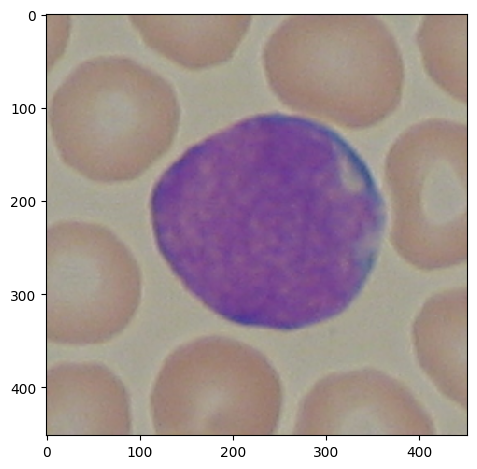

In [ ]:
import skimage
from skimage.io import imread, imshow
imshow(new_x_train[0])

In [ ]:
pip install Pillow


In [ ]:

from PIL import Image
import base64
from io import BytesIO

# Path to your local image
image_path = '/content/drive/My Drive/Research_MedicalImaging/img1.JPG'  # Replace with your image file path

# Open and convert image to base64
with open(image_path, "rb") as image_file:
    base64_image = base64.b64encode(image_file.read()).decode('utf-8')

# Print the base64 string
print(base64_image)


/9j/4AAQSkZJRgABAQEAYABgAAD/4REqRXhpZgAATU0AKgAAAAgABAE7AAIAAAAgAAAISodpAAQAAAABAAAIapydAAEAAABAAAAQ4uocAAcAAAgMAAAAPgAAAAAc6gAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [4]:
#Autoencoder#

import keras
from keras import layers

input_img = keras.Input(shape=(452, 452, 3))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='Adagrad', loss='binary_crossentropy') #metrics=['accuracy']
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 452, 452, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 452, 452, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 226, 226, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 226, 226, 8)         │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 113, 113, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 113, 113, 8)         │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 57, 57, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 57, 57, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 114, 114, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 114, 114, 8)         │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 228, 228, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 226, 226, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 452, 452, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 452, 452, 3)         │             435 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,963 (19.39 KB)

 Trainable params: 4,963 (19.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train#

import keras
import tensorflow.keras as keras
#from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('train_norm_autoencoder_200.keras', monitor='loss', save_best_only=True, mode='min'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.0, verbose=1, patience=5, mode='max')]

In [ ]:
autoencoder.fit(new_x_train, new_x_train,
                epochs=500,
                batch_size=4,
                shuffle=True,
                callbacks = callbacks)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.6949 - learning_rate: 0.0010
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step - loss: 0.6949 - learning_rate: 0.0010
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - loss: 0.6949 - learning_rate: 0.0010
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step - loss: 0.6948 - learning_rate: 0.0010
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step - loss: 0.6948 - learning_rate: 0.0010
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - loss: 0.6948
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step - loss: 0.6948 - learning_rate: 0.0010
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - loss: 0.6947 - learning_rate: 0.0000e+00
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step - loss: 0.6947 - learning_rate: 0.0000e+00
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - loss: 0.6947 - learning_rate: 0.0000e+00
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - loss: 0.6947 - 

In [5]:
#Save model#
autoencoder.save('./final_hem_autoencoder.keras')

In [ ]:
#Prediction#

import tensorflow as tf
from skimage.io import imsave, imshow
from skimage.transform import resize
import os
import numpy as np
model = tf.keras.models.load_model('./final_hem_autoencoder.keras')

img_names = os.listdir(r'/content/drive/My Drive/Research_MedicalImaging/Leuk study re-designed/ALLIDB-2/High imbalance/Train - 1 to 100 ratio/all')
img_names.sort()
print(type(model))



PATH = r'/content/drive/My Drive/Research_MedicalImaging/Leuk study re-designed/ALLIDB-2/High imbalance/Train - 1 to 100 ratio/all'
import skimage
from skimage.io import imread

set_test = np.zeros((338,452,452,3), dtype=np.uint8) #hem batch 648,  #all batch 1,219
for x in range(len(img_names)):
    img = imread(os.path.join(PATH, img_names[x]))
    img = resize(img,(new_x_train.shape[1], new_x_train.shape[2], new_x_train.shape[3]), preserve_range=True)
    set_test[x] = img

set_test = set_test/255.0
set_test = set_test.astype('float32')
print(set_test.shape)



test_preds = np.zeros((new_x_train.shape[0], new_x_train.shape[1], new_x_train.shape[2], new_x_train.shape[3]), dtype=np.float32)


for x in range(new_x_train.shape[0]):
    x_test = set_test[x]

    x_test = np.expand_dims(x_test, axis=0)

    test_preds[x] = model.predict(x_test)
    print(type(test_preds[x]))
    print(test_preds[x].shape)


    print(img_names[x][:-4])
    path = '/content/drive/My Drive/Research_MedicalImaging/Leuk study re-designed/ALLIDB-2/High imbalance/Train - 1 to 100 ratio/all' + '/' + img_names[x][:-4] + '_syn.tif'
    print(path)
    imsave(path, resize(test_preds[x].astype('float32'), (450, 450, 3), preserve_range=True))

<class 'keras.src.models.functional.Functional'>
(338, 452, 452, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
<class 'numpy.ndarray'>
(452, 452, 3)
Im074_1
/content/drive/My Drive/Research_MedicalImaging/Leuk study re-designed/ALLIDB-2/High imbalance/Train - 1 to 100 ratio/all/Im074_1_syn.tif


<ipython-input-15-d6def491eb33>:46: UserWarning: /content/drive/My Drive/Research_MedicalImaging/Leuk study re-designed/ALLIDB-2/High imbalance/Train - 1 to 100 ratio/all/Im074_1_syn.tif is a low contrast image
  imsave(path, resize(test_preds[x].astype('float32'), (450, 450, 3), preserve_range=True))
